In [1]:
import numpy
from matplotlib import pyplot
%matplotlib inline

In [13]:
# Determinar la fila donde comienza la data
!head -n 411 avghigh_ray.fld08 | tail -n 4

  0.000      0.000      0.000      0.000      0.000      0.000    
  0.000      0.000      0.000      0.000      0.000      0.000    
 -1.250000E-01 -1.350000E-01 -5.000000E-01  0.000000E+00  0.000000E+00  0.000000E+00  4.581340E-02  5.000000E-01  0.000000E+00
 -1.249709E-01 -1.350000E-01 -5.000000E-01  0.000000E+00  0.000000E+00  0.000000E+00  4.581414E-02  4.974385E-01  0.000000E+00


In [29]:
def load_data(file_name,headers):
    data = numpy.loadtxt(fname=file_name,skiprows=headers)
    return data

data = load_data('avghigh_ray.fld08',409)

In [30]:
print(data)

[[-0.125      -0.135      -0.5        ...,  0.0458134   0.5         0.        ]
 [-0.1249709  -0.135      -0.5        ...,  0.04581414  0.4974385   0.        ]
 [-0.1249062  -0.135      -0.5        ...,  0.04581537  0.4917514   0.        ]
 ..., 
 [ 0.1249062   0.135       0.5        ...,  0.04581537 -0.4917514   0.        ]
 [ 0.1249709   0.135       0.5        ...,  0.04581414 -0.4974385   0.        ]
 [ 0.125       0.135       0.5        ...,  0.0458134  -0.5         0.        ]]


In [31]:
# seleccionar la data con x = 0
slice = data[data[:,1] == 0]

In [32]:
mesh_x = slice[:,0]
mesh_z = slice[:,2]
U = slice[:,3]
V = slice[:,4]
W = slice[:,5]
P = slice[:,6]
T = slice[:,7]

In [33]:
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 14

x_ticks = numpy.arange(min(mesh_x), max(mesh_x)+0.0000001, 0.05)
y_ticks = numpy.arange(min(mesh_z), max(mesh_z)+0.0000001, 0.1)

Temp_levels = numpy.arange(min(T)-0.0000001, max(T)+0.0000001, 0.1)

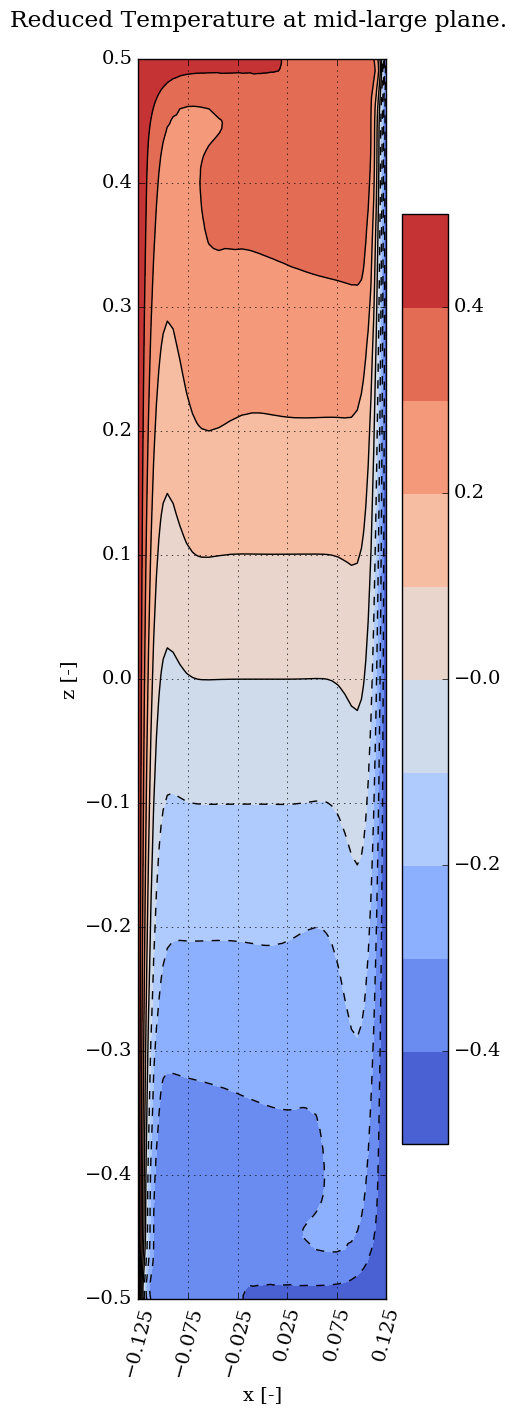

In [35]:
pyplot.figure(figsize=(4,16))
pyplot.title('Reduced Temperature at mid-large plane. \n')
pyplot.xlabel('x [-]')
pyplot.ylabel('z [-]')
pyplot.xlim([min(mesh_x),max(mesh_x)])
pyplot.ylim([min(mesh_z),max(mesh_z)])
pyplot.xticks(x_ticks, rotation=75)
pyplot.yticks(y_ticks)
pyplot.grid()
pyplot.tricontourf(mesh_x[:],mesh_z[:],T[:],
                   levels=Temp_levels,
                   cmap='coolwarm')
pyplot.colorbar()
pyplot.tricontour(mesh_x[:],mesh_z[:],T[:],
                  11,
                  ls='-.',
                  lw=2,
                  colors='black');
#pyplot.savefig('Temp.png')